In [1]:
%matplotlib inline


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as pt
import numpy as np

device = torch.device('cpu')

# if torch.cuda.is_available() > 0:
#     print("Using GPU")
#     device = torch.device('cuda')
# else:
#     print("Using CPU")

In [3]:
# Sizes of layers and batch size
n_in, n_h, n_out = 784, 200, 10

In [4]:
# Load test data

import pandas as pd

data = pd.read_csv("./train.csv").values

# 
print("Data length: {}".format(len(data)))

# training dataset
train_size = len(data)
train_data = data[0:train_size, 1:]
train_label = data[0:train_size,0]

# testing data
# xtest = data[21000:, 1:]
# actual_label = data[21000:, 0]

Data length: 42000


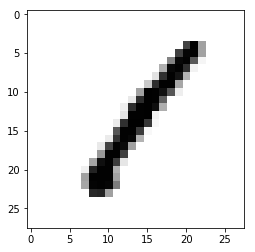

In [5]:
test_index = 0

d = train_data[test_index]
d.shape=(28,28)
pt.imshow(255-d,cmap='gray')
pt.show()

### Training 

In [9]:
%%time
# print(len(trainloader))

# Create model
model = nn.Sequential(
    nn.Linear(n_in, n_h),
    nn.ReLU(),
    nn.Linear(n_h, n_out),
    nn.Sigmoid()
)

# if torch.cuda.is_available() > 0:
model.to(device)

# Criterion
criterion = torch.nn.MSELoss()
# criterion = nn.CrossEntropyLoss()

# Optimizer function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Cast as double
model.double()

# Generate correct results
correct_results = []
for i in range(train_size):
    correct = []
    for ci in range(10):
        if train_label[i] == ci:
            correct.append(1)
        else:
            correct.append(0)
    correct = torch.from_numpy(np.array(correct).astype(float)).to(device)
    correct_results.append(correct)

# Train
stats_step = 5000
for epoch in range(20):
    running_loss = 0.0
    
    print("epoch: {}".format(epoch))
    
    for i, data in enumerate(train_data, 0):
        # Load input
        input = torch.from_numpy(data.astype(float)).to(device)
        
        # Generate prediction
        prediction = model(input)
        
        # Correct result
        correct = correct_results[i]
        
        # Compute loss
        loss = criterion(prediction, correct)

        # Zero the gradients
        optimizer.zero_grad()
        
        # Perform a backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Print stats
        running_loss += loss.item()
        if (i % stats_step == 0) and (i > 0):
            print("[{}] loss: {}".format(i, running_loss / stats_step))
            running_loss = 0

epoch: 0
[5000] loss: 0.08443897385801673
[10000] loss: 0.07238239994006218
[15000] loss: 0.06838011152572177
[20000] loss: 0.067749574535047
[25000] loss: 0.0672565799288743
[30000] loss: 0.06491287572208082
[35000] loss: 0.06281795144077003
[40000] loss: 0.06068375709742644
epoch: 1
[5000] loss: 0.05897358498494777
[10000] loss: 0.05980399995432821
[15000] loss: 0.0581566582131322
[20000] loss: 0.057798753923296774
[25000] loss: 0.05502325309740843
[30000] loss: 0.053453063121645265
[35000] loss: 0.05272032273397122
[40000] loss: 0.051085313344987913
epoch: 2
[5000] loss: 0.05013699505721219
[10000] loss: 0.04930938820244464
[15000] loss: 0.04309774818060343
[20000] loss: 0.04259904995055509
[25000] loss: 0.041737495217212484
[30000] loss: 0.04097819300129548
[35000] loss: 0.04115129624640428
[40000] loss: 0.03973798949835453
epoch: 3
[5000] loss: 0.03738859885083407
[10000] loss: 0.0369726333700325
[15000] loss: 0.032564151343975216
[20000] loss: 0.03195294875765799
[25000] loss: 0.

In [45]:
# Test model
from PIL import Image

im = Image.open('test1.png')
pix = im.load()
w, h = im.size

pixel_list = []
for x in range(0, w):
    for y in range(0, h):
        pixel_list.append(int(255 - sum(pix[y, x][0:3]) / 3))
        
for x in range(0, w):
    print()
    for y in range(0, h):
        print(1 if pixel_list[x*28 + y] >= 128 else ' ', end=' ')
        
print()        
        
input = torch.from_numpy(np.array(pixel_list).astype(float)).to(device)
prediction = model(input)

max_v = 0
max_n = 0
for n, v in enumerate(prediction):
    if v > max_v:
        max_n = n
        max_v = v

if max_v < 0.001:
    print("Uncertain")
        
for i in prediction:
    print("{0:.50f}".format(i))

print("number = {}".format(max_n))



                                                        
                                                        
                                                        
                                  1 1 1 1 1 1 1         
                1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1         
                1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1       
                1 1 1 1 1 1 1 1 1 1     1 1 1 1         
                                        1 1 1 1         
                                      1 1 1 1           
                                      1 1 1             
                                    1 1 1 1             
                                    1 1 1               
                                  1 1 1                 
                                1 1 1 1                 
                                1 1 1                   
                              1 1 1 1                   
                              1 1 1                     
                            1 

In [50]:
# train_size = len(data)
# train_data = data[0:train_size, 1:]
# train_label = data[0:train_size,0]

certain_correct = 0
certain_count = 0

uncertain_correct = 0
uncertain_count = 0

for i in range(train_size):
    data = train_data[i]
    input = torch.from_numpy(data.astype(float)).to(device)
    
    prediction = model(input)
    
    max_v = 0
    max_n = 0
    for n, v in enumerate(prediction):
        if v > max_v:
            max_n = n
            max_v = v
            
    if (max_v > 0.001):
        certain_count += 1
        if (max_n == train_label[i]):
            certain_correct += 1
            
    if (max_v < 0.001):
        uncertain_count += 1
        if (max_n == train_label[i]):
            uncertain_correct += 1
            
    if (i % stats_step == 0) and (i > 0):
            print("[{}] Certain correct {}".format(i, certain_correct / certain_count * 100))
            print("[{}] Uncertain correct {}".format(i, uncertain_correct / uncertain_count * 100))
            print("[{}] Correct percentage {}".format(i, (certain_correct + uncertain_correct) / i * 100))

print("Final statistics")
print("Certain correct {}".format(certain_correct / certain_count * 100))
print("Uncertain correct {}".format(uncertain_correct / uncertain_count * 100))
print("Correct percentage {}".format((certain_correct + uncertain_correct) / train_size * 100))

print("Certain {}".format(certain_count))
print("Uncertain {}".format(uncertain_count))



[5000] Certain correct 98.46427776541287
[5000] Uncertain correct 1.574803149606299
[5000] Correct percentage 88.64
[10000] Certain correct 98.38512083750975
[10000] Uncertain correct 1.761252446183953
[10000] Correct percentage 88.52
[15000] Certain correct 98.43715280349605
[15000] Uncertain correct 2.1999999999999997
[15000] Correct percentage 88.82
[20000] Certain correct 98.48291191997777
[20000] Uncertain correct 2.1934197407776668
[20000] Correct percentage 88.83
[25000] Certain correct 98.4332576668002
[25000] Uncertain correct 2.0126282557221784
[25000] Correct percentage 88.664
[30000] Certain correct 98.40068277116035
[30000] Uncertain correct 2.064220183486239
[30000] Correct percentage 88.60333333333334
[35000] Certain correct 98.43288089259036
[35000] Uncertain correct 2.1739130434782608
[35000] Correct percentage 88.69428571428571
[40000] Certain correct 98.47181628392484
[40000] Uncertain correct 2.2080471050049066
[40000] Correct percentage 88.665
Final statistics
Cert